# MTH9879 Homework 9

Assigned: April 4, 2019.
Due: April 18, 2019 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this Jupyter notebook to Yassine Ghalane (yassine.ghalem@gmail.com), Victor Istrakov (stavka@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or Jupyter notebook, please contact your TAs.

### 1. (12 points)
Following Almgren and Chriss,  assume that the stock price $S_t$ evolves as

$$
dS_t = \sigma\,dZ_t
$$

and the price $\tilde S_t$ at which we transact is given by

$$
\tilde S_t = S_t - \eta\,v_t
$$

where $v_t:=-{\dot x}_t$ is the rate of trading with $x_0 = X$ and $x_T = 0$.

In the lecture slides, we showed that with a risk term that penalizes average VaR instead of variance, the risk-adjusted cost of trading associated with a given price path $\{S_t\}$ is given by

$$
C = \int_0^T\,(S_t - \eta\,v_t) dx_t + \lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

for some price of risk $\lambda$. We want to find a (possibly state-dependent) control $v_t$ that minimizes the expected cost $\cC=\E[C]$.

(a) Apply the technique of integration by parts to simplify the term $\int_0^T S_t dx_t$. Write down the HJB equation for the resulting problem.



-----
The expectation of the term $\int_0^T S_t dx_t$ can be simplified as follows:
$$
\begin{align}
\int_0^T S_t dx_t =& S_TX_T - S_0X_0 - \int_0^T x_t dS_t & (\text{integration by parts})\\ 
=& S_0X_0 - \sigma\int_0^T x_t dZ_t & (X_T=0; dS_t=\sigma dZ_t)\\ 
\implies& \mathbb{E}\left[\int_0^T S_t dx_t\right] = -S_0X & (\text{Martingale expectation}) 
\end{align}
$$

The cost equation is equal to the PnL equation negated:
$$
\begin{align}
\cC(x) =&-\Pi(x)\\ 
=&-X_T(S_T-S_0) - \int_0^T (S_0 - \tilde{S}_u) dx_u\\ 
=& - \int_0^T (S_0 - S_u + \eta v_u ) dx_u & (X_T=0; \tilde{S}_u = S_t-\eta v_t)\\ 
=& \int_0^T (S_u - \eta v_u ) dx_u & (\text{simplify term as above})\\ 
\end{align}
$$

Therefore, the value function can be expressed as:
$$
\begin{align}
\cC(t,x) =& \min_{v}\left\{ \mathbb{E}[\cC(x)] \right\}\\
=& \min_{v}\left\{ \mathbb{E}\left[\int_0^T (S_t-\eta v_t) dx_t + \lambda \sigma \int_0^T x_t dt  \right]  \right\}\\
=& \min_{v}\left\{ \mathbb{E}\left[\int_0^T S_t dx_t + \eta \int_0^T \dot{x_t} dx_t +  \lambda \sigma \int_0^T x_t dt  \right]  \right\} & (v_t = -\dot{x}_t)\\
=& \min_{v}\left\{ S_0X - \eta \int_0^T \dot{x_t}^2 dt +  \lambda \sigma \int_0^T x_t dt  \right\} \\ 
=& \min_{v}\left\{ \eta \int_t^T \dot{x_t}^2 dt +  \lambda \sigma \int_t^T x_t dt  \right\} 
\end{align}
$$

Finally, the HJB control equation is:
$$
\begin{align}
&\cC_t + \lambda \sigma x + \min_{v}\{ -v \cC_x + \eta v^2 \} = 0\\
&\text{subject to}\\
&\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}
\end{align}
$$



(b) Solve the first order condition to find the optimal trading rate $v^\star$.    


-----
The first order condition when derivating with respect to $v$:
$$
\begin{align}
\cC_v =& min_{v}\left\{ -\cC_x + 2v\eta \right\}\\ 
\implies& \cC_x = 2v\eta\\ 
\implies& v^\star = \frac{\cC_x}{2\eta}\\ 
\end{align}
$$


(c) Substitute $v^\star$ back into the HJB equation to show that the value function $\cC$ must satisfy
$$
\cC_t = \frac{\cC_x^2}{4\,\eta\,} - \lambda \sigma x.
$$


-----
$$
\begin{align}
&C_t + \lambda \sigma x - \frac{C_x^2}{2\eta} + \eta\frac{C_x^2}{4\eta^2} = 0\\
\implies& C_t + \lambda \sigma x - \frac{C_x^2}{4\eta} = 0\\
\implies& C_t = \frac{C_x^2}{4\eta} - \lambda \sigma x\\ 
\end{align}
$$


(d) With the terminal condition, 
$$\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$
solve the HJB equaiton with the ansatz $\cC(t,x) = a(t)x^2 + b(t)x + c(t)$. Verify that the optimal trading strategy with liquidation horizon set to the characteristic time is given by
\begin{eqnarray*}
x_t&=&X\,\left(1-\frac{t}{T}\right)^2.
\end{eqnarray*}
Recall that with the notation of the lecture slides, the characteristic time is defined as
$$
T^\star=\sqrt{\frac{2\,X}{A}}=\sqrt{\frac{4\,\eta\,X}{\lambda\,\sigma}}
$$
Compute the risk-adjusted cost function $\cC$ associated with this strategy. 


-----
$$
\begin{align}
&\cC(t,x) = a(t) x^2 + b(t) x + c(t)\\
\implies& \cC_t = \dot{a} x^2 + \dot{b} x + \dot{c}\\
\implies& \cC_x = 2ax + b\\
\end{align}
$$

Replacing the ansatz into the control equation:
$$
\begin{align}
&C_t + \lambda \sigma x - \frac{C_x^2}{4\eta} = 0\\
\implies& \dot{a} x^2 + \dot{b} x + \dot{c} + \lambda \sigma x - \frac{(2ax + b)^2}{4\eta} = 0\\
\implies& \dot{a} x^2 + \dot{b} x + \dot{c} + \lambda \sigma x - \frac{4a^2x^2 + 4abx + b^2}{4\eta} = 0\\
\implies& \left(\dot{a} -\frac{a^2}{\eta}\right) x^2 + \left(\dot{b} + \lambda \sigma - \frac{ab}{\eta}\right) x + \left(\dot{c} -\frac{b^2}{4\eta}\right) = 0\\
\end{align}
$$

Each order term must be zero for the equation to be satisfied, converting the problem into a system of ODEs: 

$$
\begin{align}
\begin{cases}
\dot{a} -\frac{a^2}{\eta} = 0\\
\dot{b} + \lambda \sigma - \frac{ab}{\eta} = 0 \\
\dot{c} -\frac{b^2}{4\eta} = 0\\
\end{cases}
\end{align}
$$


Solving this system of equations we obtain:
$$
\begin{align}
&\dot{a} - \frac{a^2}{\eta} = 0\\ 
\implies& a(t) = \frac{\eta}{T-t}\\
\end{align}
$$

$$
\begin{align}
&\dot{b} + \lambda \sigma - \frac{b}{T-t} = 0\\ 
\implies& b(t) = \frac{\lambda \sigma}{2}\frac{t^2}{T-t} - \lambda \sigma T\frac{t}{T-t}\\ 
\end{align}
$$

The optimal strategy is given by:
$$
\begin{align}
v_t^\star =& \frac{\cC_x}{2\eta} = \frac{2a x^\star_t + b}{2\eta}\\
=& \frac{2\frac{\eta}{T-t} x^\star_t + \frac{\lambda \sigma}{2}\frac{t^2}{T-t} - \lambda \sigma T\frac{t}{T-t}}{2\eta}\\
=& \frac{x^\star_t}{T-t} + \frac{\lambda \sigma}{4\eta}\frac{t^2}{T-t} - \frac{\lambda \sigma T}{2\eta}\frac{t}{T-t} \\
\implies& -\dot{x}_t = \frac{x^\star_t}{T-t} + \frac{\lambda \sigma}{4\eta}\frac{t^2}{T-t} - \frac{\lambda \sigma T}{2\eta}\frac{t}{T-t}\\  
=& -\dot{x}_t = \frac{x^\star_t}{T-t} + \frac{A}{2}\frac{t^2}{T-t} - A T\frac{t}{T-t} & \left(A=\frac{\lambda \sigma}{2 \eta} \right)\\  
\end{align}
$$

The solution to this ODE is: 
$$
\begin{align}
x^\star_t = \frac{A}{2}t^2 + \frac{AT}{2}(T-t)\\
\end{align}
$$

Resolving for the optimal time $T^\star$:
$$
\begin{align}
x^\star_t =& \frac{A}{2}t^2 - \frac{AT}{2}t + \frac{AT^2}{2}\\
=& \frac{A}{2}t^2 - \frac{A \sqrt{\frac{2X}{A}}}{2}t + \frac{A \frac{2X}{A}}{2}\\
=& \frac{A}{2}t^2 - \frac{\sqrt{2AX}}{2}t + X\\
=& X \left(\frac{A}{2X}t^2 - \sqrt{\frac{A}{2X}}t + 1\right)\\
=& X \left(\frac{t^2}{(T^\star)^2} - \frac{t}{T^\star} + 1\right)\\
\end{align}
$$

*Here I am missing a factor of two for the $\frac{t}{T}$ term...assuming the optimal strategy is as proposed we have that the cost adjusted function is*:


$$
\begin{align}
\cC =& \eta \int_t^T \dot{x_t}^2 dt +  \lambda \sigma \int_t^T x_t dt \\
=& \eta \int_t^T 4X^2\left(1-\frac{t}{T}\right)^2 dt +  \lambda \sigma \int_t^T X \left(1-\frac{t}{T}\right)^2 dt\\
=& 4X^2\eta \int_t^T \left(1-\frac{t}{T}\right)^2 dt +  \lambda \sigma X \int_t^T \left(1-\frac{t}{T}\right)^2 dt\\
=& \left( 4X^2\eta +  \lambda \sigma X \right) \frac{(T-t)^3}{3T^2}\\
\end{align}
$$

<font color=red>COMMENT: -2pts $\mathcal{C}$ is not as expected, should be in the form, shown here without writing the explicit solution and using $\langle \rangle$ instead of coefficients functions of $\eta, \sigma, \lambda$:

$$ \langle A \rangle \, x^2 \frac{1}{(T-t)} + \frac{1}{2} \langle B \rangle \, (T-t) \, x - \frac{1}{48} \langle C \rangle \, (T-t)^3
$$</font> 



## ABM and GBM

### Set up R environment

In [1]:
library(highfrequency)
#download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
#unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



### 2. (8 points)

Recall from the lecture slides that with time-averaged VaR as the risk penalty, and when the liquidation time $T$ is chosen to be the characteristic time, the optimal trading rate under ABM becomes

$$
v^A(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\left(1-\frac t T\right)
$$

and the optimal trading rate under GBM becomes

$$
v^G(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\frac{S_t}{S_0}\,\left(1-\frac t T\right).
$$

(a) The *msft.bats* dataset from *MSFT130311.rData* contains all trades on the BATS exchange on 11-Mar-2013.  One trading days has 390 minutes.  Sample the  *msft.bats* dataset evenly, roughly every minute of volume time.  Superimpose plots of the optimal strategy under ABM and GBM assuming liquidation takes place over one trading day.


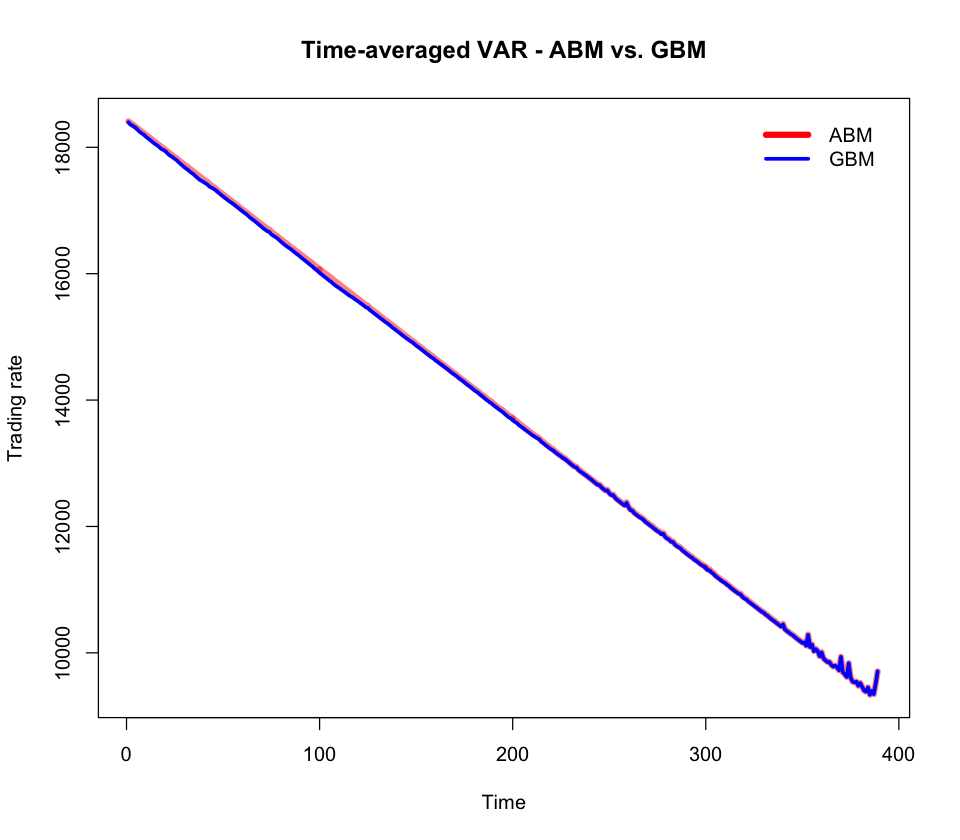

In [2]:
tT <- 390
t <- 1:tT

#total volume
total_vol <- sum(abs(msft130311.bats$signed.shares)) 
#cumulative sum of volume per trade
cumulative_vol <- cumsum(abs(msft130311.bats$signed.shares)) 
msft130311.bats <- cbind(msft130311.bats, cumulative_vol) 
#one minute of volume time
minute_vol <- round(total_vol/tT) 
S_0 <- msft130311.bats$trade.price[1] 

#selects the value in the cumulative sum column that is the closest to each minute step
#in volume time   
vol_indices <- sapply(1:tT, function(t){ 
    max(cumulative_vol[cumulative_vol <= t*minute_vol & cumulative_vol > (t-1)*minute_vol]) })

#assuming liquidation, position is decreasing
x_in <- (total_vol - vol_indices)
abm <- x_in/(tT-t)+(total_vol/tT)*(1-t/tT)

options(repr.plot.width=8)
plot(abm, type="l", col = rgb(red = 1, green = 0, blue = 0, alpha = 0.5), lwd=5,  
     xlab='Time', ylab='Trading rate', 
     main='Time-averaged VAR - ABM vs. GBM')

#prices for last trade in each minute in volume time
filtered_prices <- msft130311.bats$trade.price[msft130311.bats$cumulative_vol %in% vol_indices]
gbm <- x_in/(tT-t)+(total_vol/tT)*(filtered_prices/S_0)*(1-t/tT)
lines(gbm, col='blue',lwd=3)
legend("topright", inset=0.02, bty = "n", legend=c('ABM','GBM'), 
       col=c("red","blue"), lwd=c(5,3))

(b) Denote the corresponding position sizes by $x^A(t)$ and $x^G(t)$ respectively.  What is the maximum deviation of the two position sizes as a percentage of the initial position $X$?  How significant is this deviation?

-------
The maximum deviation is not significant, it is only about 0.0018% of the initial position. 

In [3]:
diff <- abm-gbm
max_diff <- max(abs(diff[!is.na(diff)]))
print(paste0("Maximum difference: ", max_diff))
as_pct <- (max_diff/total_vol)*100
print(paste0("As a percentage of the initial position: ", as_pct, "%"))

[1] "Maximum difference: 65.8046736976321"
[1] "As a percentage of the initial position: 0.00183066173158374%"


## Kratz and Schöneborn with time-averaged VaR risk charge

### 3. (16 points)

(a) Repeat the computation of the optimal strategy from the lecture slides with time-averaged VaR

$$
\lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

as the risk term (rather than the quadratic variation $\lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt$).  Show that the optimal position

$$
x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t)
$$
and deduce the optimal trading rate $v^\star(t)$.




-----
The cost function is 
$$
\cC(t,x) = \eta \int_0^T \dot{x}^2_t dt + \lambda \sigma \int_0^T x_t dt
$$

The corresponding HJB equation is
$$
\begin{align}
&\cC_t + \lambda \sigma x + \min_{v, y} \{ -v\cC_x + \eta v^2 + \theta(\cC(t,x-y)-\cC(t,x))) \} = 0\\   
&\text{with boundary conditions:}\\
&\cC(t,0) = 0\\
&\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}\end{cases}
\end{align}
$$


The optimal strategy occurs when $y^\star = x$ and
$$
\begin{align}
&v^\star = \frac{\cC_x}{2\eta}\\
\implies& \cC_t + \lambda \sigma x - \frac{\cC_x^2}{4\eta} - \theta \cC = 0
\end{align}
$$
Use the ansatz $C(t,x)=\eta a x^2 + \eta b x + \eta c$ and replace into the HJB equation:
$$
\left(\eta \dot{a} - \eta a^2 - \eta \theta a\right) x^2 + \left( \eta \dot{b} + \lambda \sigma - \eta a b - \eta \theta b  \right) x + \left( \eta \dot{c} - \frac{\eta}{4}b^2 - \eta \theta c\right) = 0\\ 
$$

Find $a$ and $b$ by solving the system of equations:

$$
\begin{cases}
\dot{a} - a^2 - \theta a = 0\\
\dot{b} + \frac{\lambda \sigma}{\eta} -  a b -  \theta b = 0\\
\dot{c} - \frac{b^2}{4} - \theta c = 0\\
\end{cases}
$$

$$
a(t) = -\frac{\theta}{1-e^{-\theta (T-t)}} = -\frac{\theta}{e^{\theta (T-t)}-1} - \theta
$$

$$
\begin{align}
&\dot{b} + \frac{\lambda \sigma}{\eta} -  a b -  \theta b = 0\\
\implies& \dot{b} + \frac{\lambda \sigma}{\eta} +  \frac{\theta}{e^{\theta (T-t)}-1}b + \theta b - \theta b = 0\\
\implies& \dot{b} + \frac{\lambda \sigma}{\eta} +  \frac{\theta}{e^{\theta (T-t)}-1}b =0\\
\implies& b(t) = \frac{\lambda \sigma}{\eta} \left( \frac{t}{e^{-\theta (T-t)}-1} \right) - \frac{\lambda \sigma}{\theta \eta}\left( \frac{1}{1-e^{\theta (T-t)}} \right)\\  
\end{align}
$$

The optimal strategy is given by:
$$
\begin{align}
v^\star =& \frac{C_x}{2\eta} = a x + \frac{b}{2}\\  
=& -\frac{\theta}{1-e^{-\theta (T-t)}}  x + \frac{\lambda \sigma}{2\eta} \left( \frac{t}{e^{-\theta (T-t)}-1} \right) - \frac{\lambda \sigma}{\theta 2\eta}\left( \frac{1}{1-e^{\theta (T-t)}} \right)\\
=& -\frac{\theta}{1-e^{-\theta (T-t)}}  x + A \left( \frac{t}{e^{-\theta (T-t)}-1} \right) - \frac{A}{\theta}\left( \frac{1}{1-e^{\theta (T-t)}} \right)\\
\implies& -\dot{x} = \frac{-\theta x + At }{1-e^{-\theta (T-t)}}  - \frac{A}{\theta}\left( \frac{1}{1-e^{\theta (T-t)}} \right)\\
\implies& -\dot{x} = (-\theta x + At)\frac{1-e^{\theta (T-t)}}{1-e^{-\theta (T-t)}}  - \frac{A}{\theta}\\
\implies& x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t)
\end{align}
$$


(b) By Taylor-expanding the solution around $\theta=0$, show that we retrieve the solution derived in the slides with no dark pool

$$
x^\star(t)=\left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right) .
$$

in the limit $\theta \to 0$.

Starting from 

$$
x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t)
$$

The Taylor series at $\theta = 0$ is
$$
\begin{align}
x^\star(t) =& \sum_{n=0}^{\infty} \frac{(x^\star)^{n}(0)}{n!}x^n\\ 
\approx& x^\star(0) + x'^\star(0)x + \frac{x''^\star(0)}{2!}x^2 + \cdots\\
=& \frac{(t-T) (A t T-2 x)}{2 T}+\theta \frac{ t (t-T) (A T (2 t-T)-6 x)}{12 T}+\theta^2 \frac{ t (t-T) (A t T (t-T)+2 x (T-2 t))}{24 T}+O\left(\theta^3\right)\\
\end{align}
$$

As $\theta \to 0$ and reorganizing terms:
$$
\begin{align}
x^\star(t) =&\frac{(t-T) (A t T-2 x)}{2 T}\\
=& \left( \frac{X}{T} - \frac{A}{2}t\right)(T-t) \\
=& \left( \frac{X}{T} - \frac{A}{2}t\right)(T-t) \frac{T}{T} \\
=& \left( X - \frac{AT}{2}t\right)\left(1-\frac{t}{T}\right)\\
\end{align}
$$